In [3]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

def elbow(data_dict, k_range):

    vectors = np.array(list(data_dict.values()))

    inertias_normalized = []

    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(vectors)

        n = vectors.shape[0]

        inertia_normalized = kmeans.inertia_ / n
        inertias_normalized.append(inertia_normalized)

    plt.figure(figsize=(10, 6))
    plt.plot(k_range, inertias_normalized, '-o', label='Normalized Inertia')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Normalized Inertia')
    plt.title('Elbow Method For Optimal k')
    plt.legend()
    plt.xticks(k_range)
    plt.grid(True)
    plt.show()

    

In [4]:
def stats(data_dict, k):

    vectors = np.array(list(data_dict.values()))
    keys = np.array(list(data_dict.keys()))

    n = keys.size()

    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(vectors)

    # R^2

    inertia = kmeans.inertia_
    inertia_avg = inertia / n

    global_average = vectors.sum(axis=1) / n
    global_distance_squared_avg = np.sum(((vectors - global_average)**2)) / n

    R2 = 1 - inertia_avg / global_distance_squared_avg
    # print(f'R^2: {R2}')

    # Average importance distribution

    average_importance_dist = vectors.sum(axis=1) / n

    # Average ordered importance distribution
    sorted_vectors = np.sort(vectors, axis=1)[:, ::-1]
    average_ordered_importance_dist = sorted_vectors.sum(axis=1) / n

    return [R2, average_importance_dist, average_ordered_importance_dist]







In [14]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

def permutation_test(data_dict, k, n_perm):

    vectors = np.array(list(data_dict.values()))

    R2s = []

    for perm in tqdm(range(n_perm)):

        vectors_shuffled = vectors

        for i in range(vectors_shuffled.shape[0]):
            rand_perm = np.random.permutation(np.arange(vectors_shuffled.shape[0]))
            vectors_shuffled[:,i] = vectors_shuffled[:,i][rand_perm]

        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(vectors_shuffled)

        n = vectors.shape[0]

        inertia = kmeans.inertia_
        inertia_avg = inertia / n

        global_average = vectors_shuffled.sum(axis=1) / n
        global_distance_squared_avg = (
            np.sum(((vectors_shuffled - global_average[:, None])**2)) / n)

        R2 = 1 - inertia_avg / global_distance_squared_avg
        R2s.append(R2)

    return R2s

array([[7, 2, 3],
       [1, 5, 6],
       [4, 8, 9]])

In [5]:
# Generate random data

n_data = 1000
vec_dim = 819

random_data_dict = {str(i): np.random.rand(vec_dim) for i in range(n_data)}

# Verify the size of the dictionary and the dimensionality of a sample vector
dict_size = len(random_data_dict)
sample_vector_dimension = random_data_dict['0'].shape[0]

dict_size, sample_vector_dimension

(1000, 819)

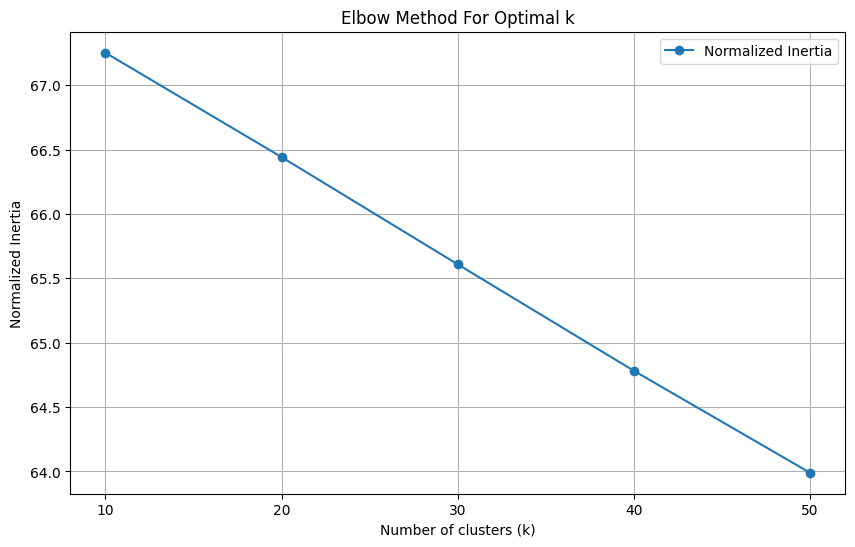

In [9]:
# Test run elbow on random data

k_list = np.arange(10, 51, 10)

elbow(random_data_dict, k_list)